<a href="https://colab.research.google.com/github/bahramzada/Airline_Passenger_Satisfaction/blob/main/Airline_Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🔶 1. Kitabxanaların yüklənməsi
# 🔶 1. Importing Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 🔶 2. Datasetlərin Yüklənməsi
# 🔶 2. Loading Datasets
# Datasetləri Kaggle-dan yükləyirik.
# We are downloading the datasets from Kaggle.
!curl -L -o airline-passenger-satisfaction.zip https://www.kaggle.com/api/v1/datasets/download/teejmahal20/airline-passenger-satisfaction

# Yüklənmiş faylı açırıq.
# We are unzipping the downloaded file.
!unzip -o /content/airline-passenger-satisfaction.zip

# Test və təlim datasetlərini yükləyirik.
# We are loading the test and train datasets.
df_test = pd.read_csv('/content/test.csv')
df_train = pd.read_csv('/content/train.csv')

# Test və təlim datasetlərini alt-alta birləşdiririk.
# We are concatenating the test and train datasets vertically.
df = pd.concat([df_test, df_train], ignore_index=True)

print("Birləşdirilmiş datasetin ölçüsü: (Merged dataset shape:", df.shape, ")")
print("\nBirləşdirilmiş datasetin ilk 5 sətri: (First 5 rows of the merged dataset:)")
print(df.head())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2775k  100 2775k    0     0  5145k      0 --:--:-- --:--:-- --:--:-- 16.0M
Archive:  /content/airline-passenger-satisfaction.zip
  inflating: test.csv                
  inflating: train.csv               
Birləşdirilmiş datasetin ölçüsü: (Merged dataset shape: (129880, 25) )

Birləşdirilmiş datasetin ilk 5 sətri: (First 5 rows of the merged dataset:)
   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Cu

In [ ]:
# 🔶 3. İlkin Baxış və Duplikatların Yoxlanılması
# 🔶 3. Initial Inspection and Duplicate Check
# Təkrarlanan sətirləri yoxlayırıq.
# We are checking for duplicate rows.
duplicates_sum = df.duplicated().sum()
print("Təkrarlanan sətirlərin sayı: (Number of duplicate rows:)", duplicates_sum)

# Bütün sütunları göstərmək üçün display seçimini tənzimləyirik.
# We are setting the display option to show all columns.
pd.set_option('display.max_columns', None)

# 'Unnamed: 0' və 'id' sütunlarını modelə lazım olmadığı üçün silirik.
# We are dropping 'Unnamed: 0' and 'id' columns as they are not needed for modeling.
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
print("\n'Unnamed: 0' və 'id' sütunları silindikdən sonra datasetin ölçüsü: (Shape after dropping 'Unnamed: 0' and 'id':)", df.shape)

Təkrarlanan sətirlərin sayı: (Number of duplicate rows:) 0

'Unnamed: 0' və 'id' sütunları silindikdən sonra datasetin ölçüsü: (Shape after dropping 'Unnamed: 0' and 'id':) (129880, 23)


In [ ]:
# 🔶 4. Boş Dəyərlərin Təmizlənməsi
# 🔶 4. Handling Missing Values
# Hər sütundakı boş (null) dəyərləri yoxlayırıq.
# We are checking for missing (null) values in each column.
null_values_before_fill = df.isna().sum()
print("Boş dəyərlər doldurulmamışdan əvvəl hər sütundakı boş dəyərlərin sayı: (Number of null values per column before filling:)")
print(null_values_before_fill)

# 'Arrival Delay in Minutes' sütununda boş olan sətirləri göstəririk.
# We are displaying rows where 'Arrival Delay in Minutes' is null.
null_arrival_delay_rows = df[df['Arrival Delay in Minutes'].isnull()]
print("\n'Arrival Delay in Minutes' sütununda boş olan sətirlər: (Rows with null 'Arrival Delay in Minutes':)")
print(null_arrival_delay_rows.head())

# 'Arrival Delay in Minutes' sütunundakı boş dəyərləri 'Departure Delay in Minutes' sütununun dəyərləri ilə doldururuq.
# Not: inplace=True istifadə etmək əvəzinə, dəyərləri birbaşa təyin etmək daha yaxşıdır.
# Note: Instead of using inplace=True, it's better to assign the values directly.
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'])

print("\n'Arrival Delay in Minutes' sütunu doldurulduqdan sonra null sayları: (Null counts after filling 'Arrival Delay in Minutes':)")
print(df.isna().sum())

# DataFrame-in məlumatlarını (data tipləri və boş olmayan saylar) yoxlayırıq.
# We are checking the information of the DataFrame (data types and non-null counts).
print("\nDataFrame məlumatları: (DataFrame info:)")
df.info()

Boş dəyərlər doldurulmamışdan əvvəl hər sütundakı boş dəyərlərin sayı: (Number of null values per column before filling:)
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in 

In [ ]:
# 🔶 5. Kateqorik Sütunların Encoding-i
# 🔶 5. Encoding Categorical Columns
# 'satisfaction' sütununu ikili dəyərlərə (0 və ya 1) çeviririk.
# We are converting the 'satisfaction' column to binary values (0 or 1).
# 0 -> "neutral or dissatisfied", 1 -> "satisfied"
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# Kateqorik sütunları təyin edirik.
# We are identifying categorical columns.
# Label Encoding istifadə edirik (qeyd: OneHotEncoding bəzi hallarda daha uyğun ola bilər).
# We are using Label Encoding (note: OneHotEncoding might be more suitable in some cases).
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class'] # 'satisfaction' artıq kodlaşdırıldığı üçün burdan çıxarırıq.
label_encoders = {}

for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nLabel Encoding tətbiq edildikdən sonra datasetin ilk 5 sətri: (First 5 rows after Label Encoding:)")
print(df.head())
print("\nLabel Encoding tətbiq edildikdən sonra datasetin ölçüsü: (Shape after Label Encoding:)", df.shape)


Label Encoding tətbiq edildikdən sonra datasetin ilk 5 sətri: (First 5 rows after Label Encoding:)
   Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       0              0   52               0      1              160   
1       0              0   36               0      0             2863   
2       1              1   20               0      1              192   
3       1              0   44               0      0             3377   
4       0              0   49               0      1             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0    

In [ ]:
# 🔶 6. Xüsusiyyətlərin (X) və Hədəfin (y) Ayrılması
# 🔶 6. Separating Features (X) and Target (y)
# Datasetimizi giriş xüsusiyyətlərinə (X) və hədəf dəyişəninə (y) ayırırıq.
# We are separating our dataset into input features (X) and the target variable (y).
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

print("X (Giriş Xüsusiyyətləri) ölçüsü: (X (Input Features) shape:)", X.shape)
print("y (Hədəf Dəyişəni) ölçüsü: (y (Target Variable) shape:)", y.shape)

X (Giriş Xüsusiyyətləri) ölçüsü: (X (Input Features) shape:) (129880, 22)
y (Hədəf Dəyişəni) ölçüsü: (y (Target Variable) shape:) (129880,)


In [ ]:
# 🔶 7. Təlim və Test Dəstlərinin Bölünməsi
# 🔶 7. Splitting into Training and Test Sets
# Dataseti təlim (training) və test dəstlərinə bölürük.
# We are splitting the dataset into training and test sets.
# test_size=0.2 o deməkdir ki, məlumatın 20%-i test üçün, 80%-i isə təlim üçün istifadə olunacaq.
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training.
# random_state sabit təkrarlanma (reproducibility) üçün istifadə olunur.
# random_state is used for consistent reproducibility.
# stratify=y siniflərin paylanmasını təlim və test dəstlərində eyni saxlayır (balanssız siniflər üçün vacibdir).
# stratify=y ensures that the class distribution is preserved in both training and test sets (important for imbalanced classes).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train ölçüsü: (X_train shape:)", X_train.shape)
print("X_test ölçüsü: (X_test shape:)", X_test.shape)
print("y_train ölçüsü: (y_train shape:)", y_train.shape)
print("y_test ölçüsü: (y_test shape:)", y_test.shape)

X_train ölçüsü: (X_train shape:) (103904, 22)
X_test ölçüsü: (X_test shape:) (25976, 22)
y_train ölçüsü: (y_train shape:) (103904,)
y_test ölçüsü: (y_test shape:) (25976,)


In [ ]:
# 🔶 8. Miqyaslama (StandardScaler)
# 🔶 8. Scaling (StandardScaler)
# Xüsusiyyətlərin miqyaslanmasını (StandardScaler) həyata keçiririk.
# We are performing feature scaling using StandardScaler.
# StandardScaler hər bir sütunun orta dəyərini 0, standart kənarlaşmasını 1 edir.
# StandardScaler transforms each column to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Miqyaslandıqdan sonra X_train ölçüsü: (X_train shape after scaling:)", X_train_scaled.shape)
print("Miqyaslandıqdan sonra X_test ölçüsü: (X_test shape after scaling:)", X_test_scaled.shape)

Miqyaslandıqdan sonra X_train ölçüsü: (X_train shape after scaling:) (103904, 22)
Miqyaslandıqdan sonra X_test ölçüsü: (X_test shape after scaling:) (25976, 22)


In [ ]:
# 🔶 9. TensorFlow Modelinin Qurulması
# 🔶 9. Building the TensorFlow Model
# TensorFlow Keras modelini qururuq.
# We are building the TensorFlow Keras model.
model = tf.keras.Sequential([
    # Birinci qat: 256 neyron, 'relu' aktivasiya funksiyası.
    # input_shape modelin gözlədiyi giriş formasını müəyyən edir (miqyaslanmış təlim datasının sütun sayı).
    # First layer: 256 neurons, 'relu' activation function.
    # input_shape specifies the expected input shape (number of columns in the scaled training data).
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.BatchNormalization(), # Batch Normalizasiya: təlimi sabitləşdirmək üçün istifadə edirik.
                                          # Batch Normalization: used to stabilize training.
    tf.keras.layers.Dropout(0.4),         # Dropout: overfitting-in (həddindən artıq uyğunlaşmanın) qarşısını almaq üçün 40% dropout tətbiq edirik.
                                          # Dropout: we apply 40% dropout to prevent overfitting.

    # İkinci gizli qat: 128 neyron, 'relu' aktivasiya funksiyası.
    # Second hidden layer: 128 neurons, 'relu' activation function.
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    # Üçüncü gizli qat: 64 neyron, 'relu' aktivasiya funksiyası.
    # Third hidden layer: 64 neurons, 'relu' activation function.
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    # Çıxış qatı: 1 neyron, 'sigmoid' aktivasiya funksiyası.
    # İkili təsnifat problemi (məmnun/məmnun deyil) olduğu üçün 'sigmoid' istifadə edirik ki, çıxış ehtimal dəyəri (0 ilə 1 arası) olsun.
    # Output layer: 1 neuron, 'sigmoid' activation function.
    # We use 'sigmoid' for binary classification problems (satisfied/not satisfied) to get a probability output (between 0 and 1).
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Modeli kompayl edirik.
# We are compiling the model.
# optimizer='adam': Modelin çəkilərini necə yeniləyəcəyini müəyyən edən optimizator.
# optimizer='adam': The optimizer that determines how the model's weights will be updated.
# loss='binary_crossentropy': İkili təsnifat üçün itki funksiyası.
# loss='binary_crossentropy': The loss function for binary classification.
# metrics=['accuracy']: Təlim zamanı izləyəcəyimiz metrika (dəqiqlik).
# metrics=['accuracy']: The metric we will monitor during training (accuracy).
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Modelin xülasəsinə baxırıq.
# We are displaying the model summary.
print("\nModelin xülasəsi: (Model Summary:)")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Modelin xülasəsi: (Model Summary:)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,001 (187.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# 🔶 10. Modelin Öyrədilməsi
# 🔶 10. Training the Model
# Erkən dayandırma (Early Stopping) callback-i əlavə edirik.
# We are adding an Early Stopping callback.
# monitor='val_loss': Validasiya itkisini izləyirik.
# monitor='val_loss': We are monitoring the validation loss.
# patience=10: 10 epox boyunca validasiya itkisi yaxşılaşmasa, təlimi dayandırırıq.
# patience=10: We stop training if validation loss does not improve for 10 epochs.
# restore_best_weights=True: Təlimin dayandığı ən yaxşı validasiya itkisi olan epoxun çəkilərini bərpa edirik.
# restore_best_weights=True: We restore the model weights from the epoch with the best validation loss.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli öyrədirik.
# We are training the model.
# epochs=50: Maksimum epox sayı (EarlyStopping ilə dayanacaq).
# epochs=50: Maximum number of epochs (will stop early with EarlyStopping).
# batch_size=64: Hər təlim addımında 64 nümunənin istifadəsi.
# batch_size=64: Number of samples per gradient update.
# validation_split=0.15: Təlim datasının 15%-ni validasiya üçün ayırırıq.
# validation_split=0.15: We allocate 15% of the training data for validation.
# callbacks=[early_stopping]: EarlyStopping mexanizmini aktivləşdiririk.
# callbacks=[early_stopping]: We activate the EarlyStopping mechanism.
print("\nModel öyrədilməyə başlayır... (Model training is starting...)")
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.15,
                    callbacks=[early_stopping],
                    verbose=1)
print("Model öyrədilməsi tamamlandı. (Model training completed.)")


Model öyrədilməyə başlayır... (Model training is starting...)
Epoch 1/50
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8752 - loss: 0.2973 - val_accuracy: 0.9428 - val_loss: 0.1399
Epoch 2/50
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9285 - loss: 0.1793 - val_accuracy: 0.9516 - val_loss: 0.1182
Epoch 3/50
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9375 - loss: 0.1541 - val_accuracy: 0.9554 - val_loss: 0.1099
Epoch 4/50
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9405 - loss: 0.1433 - val_accuracy: 0.9589 - val_loss: 0.1008
Epoch 5/50
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9450 - loss: 0.1341 - val_accuracy: 0.9597 - val_loss: 0.0964
Epoch 6/50
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9471 - loss: 0.1293 - val_accuracy: 0.9600 - val_loss: 0.0965
Epoch 7/50
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9498 - loss: 0.1235 - val_accuracy: 0.9626 - val_loss: 0.0920
Epoch 8/50
1380/1380 ━━━━


Model test dəsti üzərində qiymətləndirilir... (Model is being evaluated on the test set...)
Test İtkisi: 0.0824 (Test Loss)
Test Dəqiqliyi: 96.44% (Test Accuracy)
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Klassifikasiya Hesabatı: (Classification Report:)
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14690
           1       0.97      0.94      0.96     11286

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



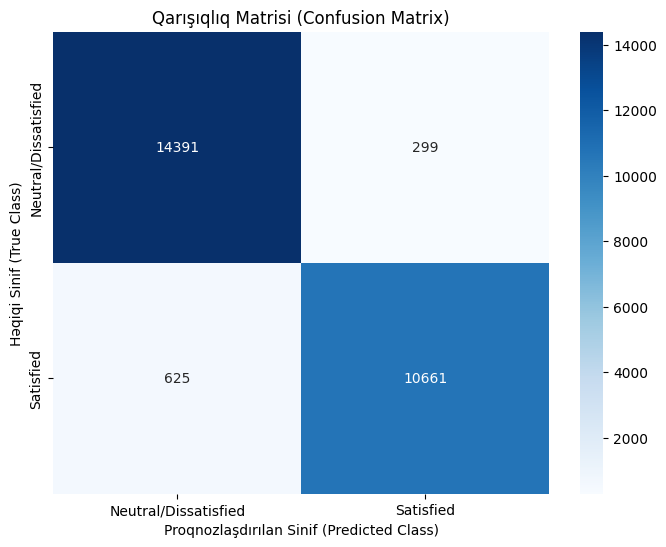

In [ ]:
# 🔶 11. Modelin Test Dəstində Qiymətləndirilməsi
# 🔶 11. Evaluating the Model on the Test Set
# Modelin test dəsti üzərində performansını qiymətləndiririk.
# We are evaluating the model's performance on the test set.
print("\nModel test dəsti üzərində qiymətləndirilir... (Model is being evaluated on the test set...)")
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test İtkisi: {loss:.4f} (Test Loss)")
print(f"Test Dəqiqliyi: {accuracy*100:.2f}% (Test Accuracy)")

# Proqnozlar edirik.
# We are making predictions.
# Sigmoid çıxışı ehtimallar olduğu üçün 0.5-dən böyük dəyərləri "satisfied" (1), əksini "not satisfied" (0) kimi qəbul edirik.
# Since sigmoid output is probabilities, we classify values greater than 0.5 as "satisfied" (1), otherwise "not satisfied" (0).
y_pred_proba = model.predict(X_test_scaled)
y_pred_labels = (y_pred_proba > 0.5).astype(int)

# Klassifikasiya hesabatını çap edirik.
# We are printing the classification report.
print("\nKlassifikasiya Hesabatı: (Classification Report:)")
print(classification_report(y_test, y_pred_labels))

# Qarışıqlıq Matrisi vizualizasiyasını əlavə edirik.
# We are adding Confusion Matrix visualization.
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
            yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.xlabel('Proqnozlaşdırılan Sinif (Predicted Class)')
plt.ylabel('Həqiqi Sinif (True Class)')
plt.title('Qarışıqlıq Matrisi (Confusion Matrix)')
plt.show()

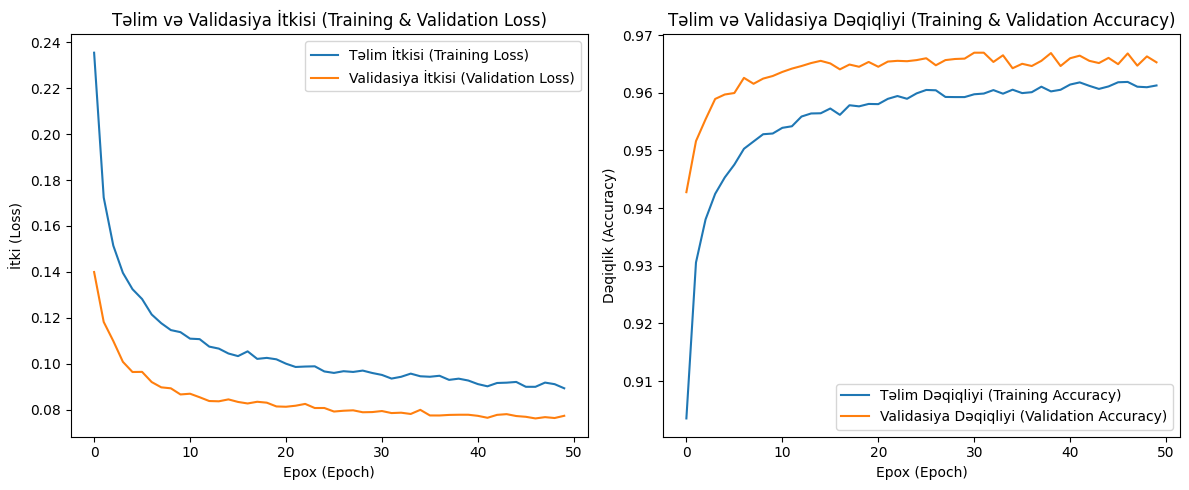

In [ ]:
# 🔶 12. Öyrənmə Əyriləri (Learning Curves)
# 🔶 12. Learning Curves
# Təlim/Validasiya itkisi və dəqiqliyi qrafikləri çəkirik.
# We are plotting the Training/Validation loss and accuracy curves.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Təlim İtkisi (Training Loss)')
plt.plot(history.history['val_loss'], label='Validasiya İtkisi (Validation Loss)')
plt.title('Təlim və Validasiya İtkisi (Training & Validation Loss)')
plt.xlabel('Epox (Epoch)')
plt.ylabel('İtki (Loss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Təlim Dəqiqliyi (Training Accuracy)')
plt.plot(history.history['val_accuracy'], label='Validasiya Dəqiqliyi (Validation Accuracy)')
plt.title('Təlim və Validasiya Dəqiqliyi (Training & Validation Accuracy)')
plt.xlabel('Epox (Epoch)')
plt.ylabel('Dəqiqlik (Accuracy)')
plt.legend()

plt.tight_layout()
plt.show()